In [56]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# HTTP library
import requests

# Stream of in-memory bytes
from io import BytesIO
# Pillow library
from PIL import Image
# OpenCV library
import cv2

from skimage.segmentation import active_contour

print (cv2.__version__)
# tested Python 2 or 3 + OpenCV v 3.2.0

3.4.3


In [57]:
SSBD_BASE_URL = "http://ssbd.qbic.riken.jp/image"

url = SSBD_BASE_URL
if requests.session().get(url).status_code == 200:
    print("Successfully connected to SSBD")
else:
    print("Failed to connect to SSBD")
print(url)

Successfully connected to SSBD
http://ssbd.qbic.riken.jp/image


http://ssbd.qbic.riken.jp/image/webgateway/render_image/33724/0/0


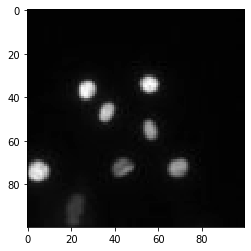

In [58]:
# Aoki-san's image T=0
IMAGE_ID = 33724
Z = 0
T = 0

TMP_URL = "{base}/webgateway/render_image/{image_id}/{z}/{t}"
qs = {'base': SSBD_BASE_URL, 'image_id': IMAGE_ID, 'z': Z, 't': T}

url = TMP_URL.format(**qs)

r = requests.session().get(url)
if r.status_code != 200:
    print("access error (1)")
    sys.exit()

# PIL (RGB) -> OpenCV (Grayscale)
cv_img1 = cv2.cvtColor(np.array(Image.open(BytesIO(r.content))), cv2.COLOR_RGB2GRAY)
plt.imshow(cv_img1, 'gray')

print(url)

http://ssbd.qbic.riken.jp/image/webgateway/render_image/33724/0/150


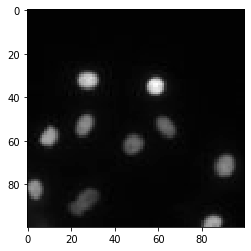

In [59]:
# Aoki-san's image T=150
IMAGE_ID = 33724
Z = 0
T = 150

TMP_URL = "{base}/webgateway/render_image/{image_id}/{z}/{t}"
qs = {'base': SSBD_BASE_URL, 'image_id': IMAGE_ID, 'z': Z, 't': T}

url = TMP_URL.format(**qs)

r = requests.session().get(url)
if r.status_code != 200:
    print("access error (1)")
    sys.exit()

# PIL (RGB) -> OpenCV (Grayscale)
cv_img1 = cv2.cvtColor(np.array(Image.open(BytesIO(r.content))), cv2.COLOR_RGB2GRAY)
plt.imshow(cv_img1, 'gray')

print(url)

In [60]:
TMP_URL = "{base}/webclient/imgData/{image_id}/"
qs = {'base': SSBD_BASE_URL, 'image_id': IMAGE_ID}
url = TMP_URL.format(**qs)

r = requests.session().get(url)
if r.status_code != 200:
    print("access error")
    sys.exit()

metadata = r.json()

print (url)
print ("ProjectName:", metadata['meta']['projectName'])
print ("Dataset:", metadata['meta']['datasetName'])
print ("X:", metadata['size']['width'])
print ("Y:", metadata['size']['height'])
print ("Z:", metadata['size']['z'])
print ("T:", metadata['size']['t'])
print ("C:", metadata['size']['c'])
print ("PixelsType: ", metadata['meta']['pixelsType'])
print ("PixwlRange: ", metadata['pixel_range'][1])

print ("\n", metadata)

http://ssbd.qbic.riken.jp/image/webclient/imgData/33724/
ProjectName: 17-Aoki-MolDyn
Dataset: sample1
X: 100
Y: 100
Z: 1
T: 391
C: 1
PixelsType:  uint16
PixwlRange:  65535

 {'init_zoom': 0, 'tiles': False, 'perms': {'canAnnotate': False, 'canEdit': False, 'canDelete': False, 'canLink': False}, 'rdefs': {'defaultT': 0, 'model': 'greyscale', 'invertAxis': False, 'projection': 'normal', 'defaultZ': 0}, 'pixel_range': [0, 65535], 'interpolate': True, 'channels': [{'coefficient': 1.0, 'active': True, 'window': {'max': 670.0, 'end': 670.0, 'start': 0.0, 'min': 0.0}, 'family': 'linear', 'color': '808080', 'inverted': False, 'reverseIntensity': False, 'emissionWave': None, 'label': 'CFP'}], 'meta': {'projectName': '17-Aoki-MolDyn', 'imageId': 33724, 'imageAuthor': 'public data', 'imageTimestamp': 1342683835.0, 'pixelsType': 'uint16', 'datasetId': 208, 'projectDescription': 'See details in Aoki et al. (2013) Molecular Cell, 52(4): 529-540', 'datasetName': 'sample1', 'wellSampleId': '', 'projec

maxPixel 65535 threshold 47.0


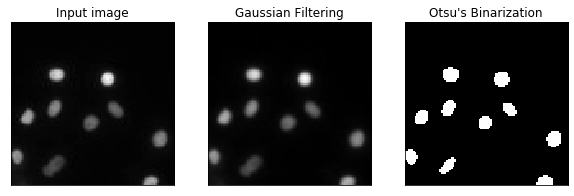

In [61]:
# Filterd
cv_img2 = cv2.GaussianBlur(cv_img1, (3,3), 0)
#cv_img2 = cv2.medianBlur(cv_img1, 3)

maxPixel = int(metadata['pixel_range'][1])
threshold, cv_img3 = cv2.threshold(cv_img2, 0, maxPixel, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print ("maxPixel", maxPixel, "threshold", threshold)
#thresh = 60
#ret, cv_img3 = cv2.threshold(cv_img2, thresh, maxPixel, cv2.THRESH_BINARY)

titles = ['Input image', "Gaussian Filtering", "Otsu's Binarization"]
images = [cv_img1, cv_img2, cv_img3]

plt.figure(figsize=(10,3))
for i in range(0, 3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.savefig('result1.tiff')

maxPixel 65535 threshold 47.0
number of labels: 11
(100, 100) int32


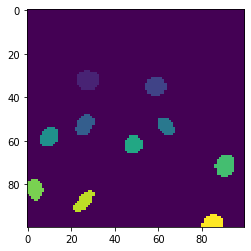

In [76]:
# Filterd
cv_img2 = cv2.GaussianBlur(cv_img1, (3,3), 0)
#cv_img2 = cv2.medianBlur(cv_img1, 3)

maxPixel = int(metadata['pixel_range'][1])
threshold, cv_img3 = cv2.threshold(cv_img2, 0, maxPixel, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print ("maxPixel", maxPixel, "threshold", threshold)
#thresh = 60
#ret, cv_img3 = cv2.threshold(cv_img2, thresh, maxPixel, cv2.THRESH_BINARY)

retval, labels, stats, centroids = cv2.connectedComponentsWithStats(cv_img3)
print("number of labels:", retval)
print(labels.shape, labels.dtype)

fig, ax = plt.subplots(facecolor="w")
ax.imshow(labels)

plt.show()

In [77]:
print(stats.shape, stats.dtype)
for i, row in enumerate(stats):
  print(f"label {i}")
  print(f"  size: ({row[cv2.CC_STAT_WIDTH]} px, {row[cv2.CC_STAT_HEIGHT]} px)")
  print(f"  area: {row[cv2.CC_STAT_AREA]}")

(11, 5) int32
label 0
  size: (100 px, 100 px)
  area: 9393
label 1
  size: (10 px, 9 px)
  area: 75
label 2
  size: (10 px, 9 px)
  area: 71
label 3
  size: (9 px, 10 px)
  area: 64
label 4
  size: (8 px, 8 px)
  area: 50
label 5
  size: (8 px, 9 px)
  area: 60
label 6
  size: (8 px, 8 px)
  area: 54
label 7
  size: (9 px, 10 px)
  area: 72
label 8
  size: (8 px, 10 px)
  area: 58
label 9
  size: (10 px, 10 px)
  area: 55
label 10
  size: (10 px, 6 px)
  area: 48


In [78]:
print(centroids.shape, centroids.dtype)
for i, row in enumerate(centroids):
    print(f"label {i} topleft: ({row[0]}, {row[1]})")

(11, 2) float64
label 0 topleft: (49.88555307143618, 48.744490578090065)
label 1 topleft: (27.48, 32.16)
label 2 topleft: (58.53521126760563, 34.943661971830984)
label 3 topleft: (26.0625, 52.6875)
label 4 topleft: (63.36, 53.44)
label 5 topleft: (9.683333333333334, 58.166666666666664)
label 6 topleft: (48.388888888888886, 61.611111111111114)
label 7 topleft: (90.38888888888889, 71.375)
label 8 topleft: (3.189655172413793, 82.25862068965517)
label 9 topleft: (25.727272727272727, 87.72727272727273)
label 10 topleft: (84.79166666666667, 96.95833333333333)


In [91]:
height, width = cv_img1.shape[:2]
total_intensity = np.zeros(retval)

for y in range(0, height):
  for x in range(0, width):
    if labels[y, x] > 0:
#      print(f"intensity {cv_img1[y, x]}")
      total_intensity[labels[y, x]] = total_intensity[labels[y, x]] + cv_img1[y, x]

for i in range(0, retval):
  print(f"label {i+1} total_intensity: {total_intensity[i]}")

label 1 total_intensity: 0.0
label 2 total_intensity: 8547.0
label 3 total_intensity: 9137.0
label 4 total_intensity: 5468.0
label 5 total_intensity: 3565.0
label 6 total_intensity: 6058.0
label 7 total_intensity: 3895.0
label 8 total_intensity: 6063.0
label 9 total_intensity: 5194.0
label 10 total_intensity: 3144.0
label 11 total_intensity: 4845.0
